# Preparation



### Import Lib

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Mounted at /content/drive


### Import Dataset

In [2]:
file_path = "/content/drive/MyDrive/Data_Analytics/Dataset/dataset_cleaned_oversampling.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=["dataset"])

# EDA

### Dataset Structure

In [9]:
df.info(show_counts=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21678 entries, 0 to 21677
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             21678 non-null  int64  
 1   Gender          21678 non-null  int64  
 2   BMI             21678 non-null  float64
 3   SBP             21678 non-null  float64
 4   DBP             21678 non-null  float64
 5   FPG             21678 non-null  float64
 6   Chol            21678 non-null  float64
 7   Tri             21678 non-null  float64
 8   HDL             21678 non-null  float64
 9   LDL             21678 non-null  float64
 10  ALT             21678 non-null  float64
 11  AST             21678 non-null  float64
 12  BUN             21678 non-null  float64
 13  CCR             21678 non-null  float64
 14  FFPG            21678 non-null  float64
 15  Smoking         21678 non-null  int64  
 16  Drinking        21678 non-null  int64  
 17  Family_history  21678 non-null 

In [10]:
df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,AST,BUN,CCR,FFPG,Smoking,Drinking,Family_history,Diabetes
0,38,1,22.3,121.0,70.0,5.27,4.03,0.85,0.97,2.44,11.0,15.3,2.94,55.8,5.44,2,2,1,0
1,46,1,23.0,100.0,72.0,5.00,4.61,2.52,0.91,2.55,22.0,20.0,4.40,58.8,5.21,2,2,0,0
2,38,0,25.9,158.0,89.0,6.00,4.65,1.44,1.65,2.38,18.5,23.2,5.00,73.6,6.00,2,2,0,0
3,30,1,19.1,102.0,56.0,5.11,4.30,1.10,1.36,2.65,18.0,18.0,3.56,52.0,4.80,2,2,0,0
4,34,1,21.8,110.0,66.0,4.78,4.84,1.41,1.46,2.62,23.5,24.5,4.68,53.9,5.05,2,2,0,0


### Check Missing Value

In [11]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
SBP,0
DBP,0
FPG,0
Chol,0
Tri,0
HDL,0
LDL,0


### Descriptive statistics

In [12]:
num_columns = ["Age", "BMI", "SBP", "DBP", "FPG", "Chol", "Tri", "HDL", "LDL", "ALT", "AST", "BUN", "CCR", "FFPG"]
df_num = df[num_columns]

cat_columns = ["Gender", "Smoking", "Drinking", "Family_history", "Diabetes"]
df_cat = df[cat_columns]
df_cat = df_cat.astype("category")
df_cat["Gender"] = df_cat["Gender"].replace({0: "Male", 1: "Female"})
df_cat["Smoking"] = df_cat["Smoking"].replace({0: "Current Smoker", 1: "Ever Smoker", 2: "Never Smoker"})
df_cat["Drinking"] = df_cat["Drinking"].replace({0: "Current Drinker", 1: "Ever Drinker", 2: "Never Drinker"})
df_cat["Family_history"] = df_cat["Family_history"].replace({0: "No", 1: "Yes"})
df_cat["Diabetes"] = df_cat["Diabetes"].replace({0: "No", 1: "Yes"})

In [13]:
df_num.describe()

,Age,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,AST,BUN,CCR,FFPG
count,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000
mean,49.174324,24.301802,123.936471,76.635326,5.355398,4.889589,1.647322,1.316717,2.807852,27.075738,25.735659,4.897010,72.523376,5.929494
std,14.363975,3.265485,17.744592,11.066258,0.768204,0.865699,1.122857,0.269565,0.617482,21.917435,9.462472,1.178626,15.662343,1.387587
min,21.000000,15.000000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.310000,2.000000,0.000000,1.000000,28.100000,3.200000
25%,36.000000,22.100000,111.000000,68.230000,4.820000,4.300000,0.930000,1.160000,2.410000,15.000000,20.980000,4.090000,61.000000,5.000000
50%,49.000000,24.240000,122.230000,76.000000,5.300000,4.850000,1.370000,1.280000,2.840000,21.000000,25.700000,4.800000,72.100000,5.500000
75%,60.000000,26.390000,134.977500,84.000000,5.930000,5.410000,2.040000,1.460000,3.110000,31.000000,26.680000,5.560000,82.900000,6.570000
max,91.000000,45.800000,202.000000,143.000000,6.990000,13.230000,32.640000,10.400000,9.310000,511.600000,243.100000,17.730000,307.000000,29.700000


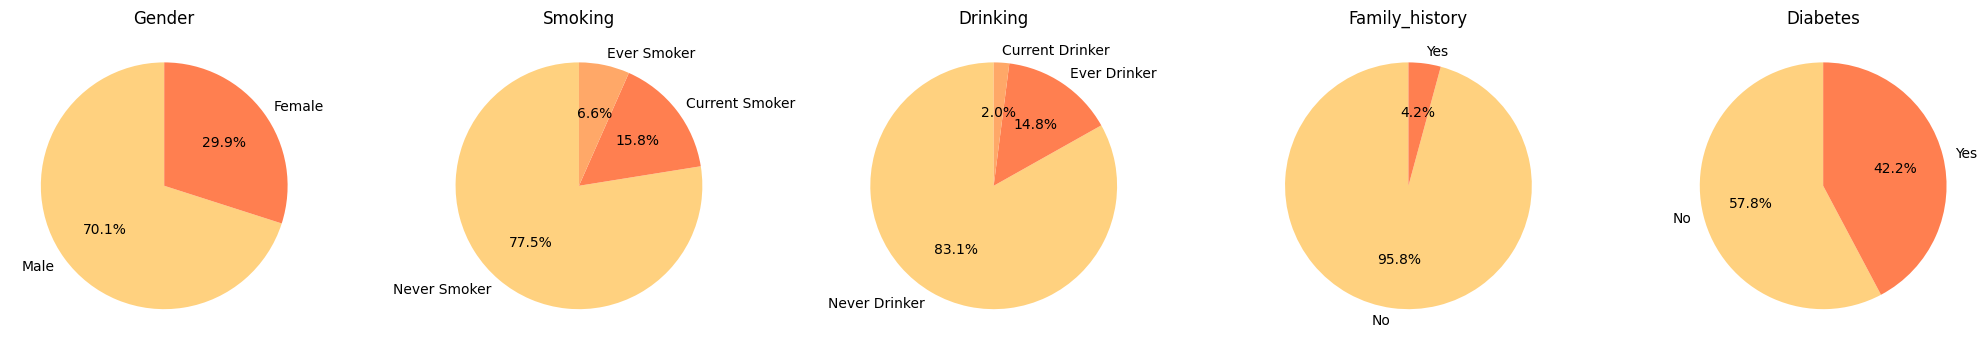

In [14]:
fig, axes = plt.subplots(1, len(cat_columns), figsize=(20, 5))
colors = ["#FFD17F", "coral", "#FFA868"]
for i, col in enumerate(cat_columns):
    data = df_cat[col].value_counts()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


### Data Distribution

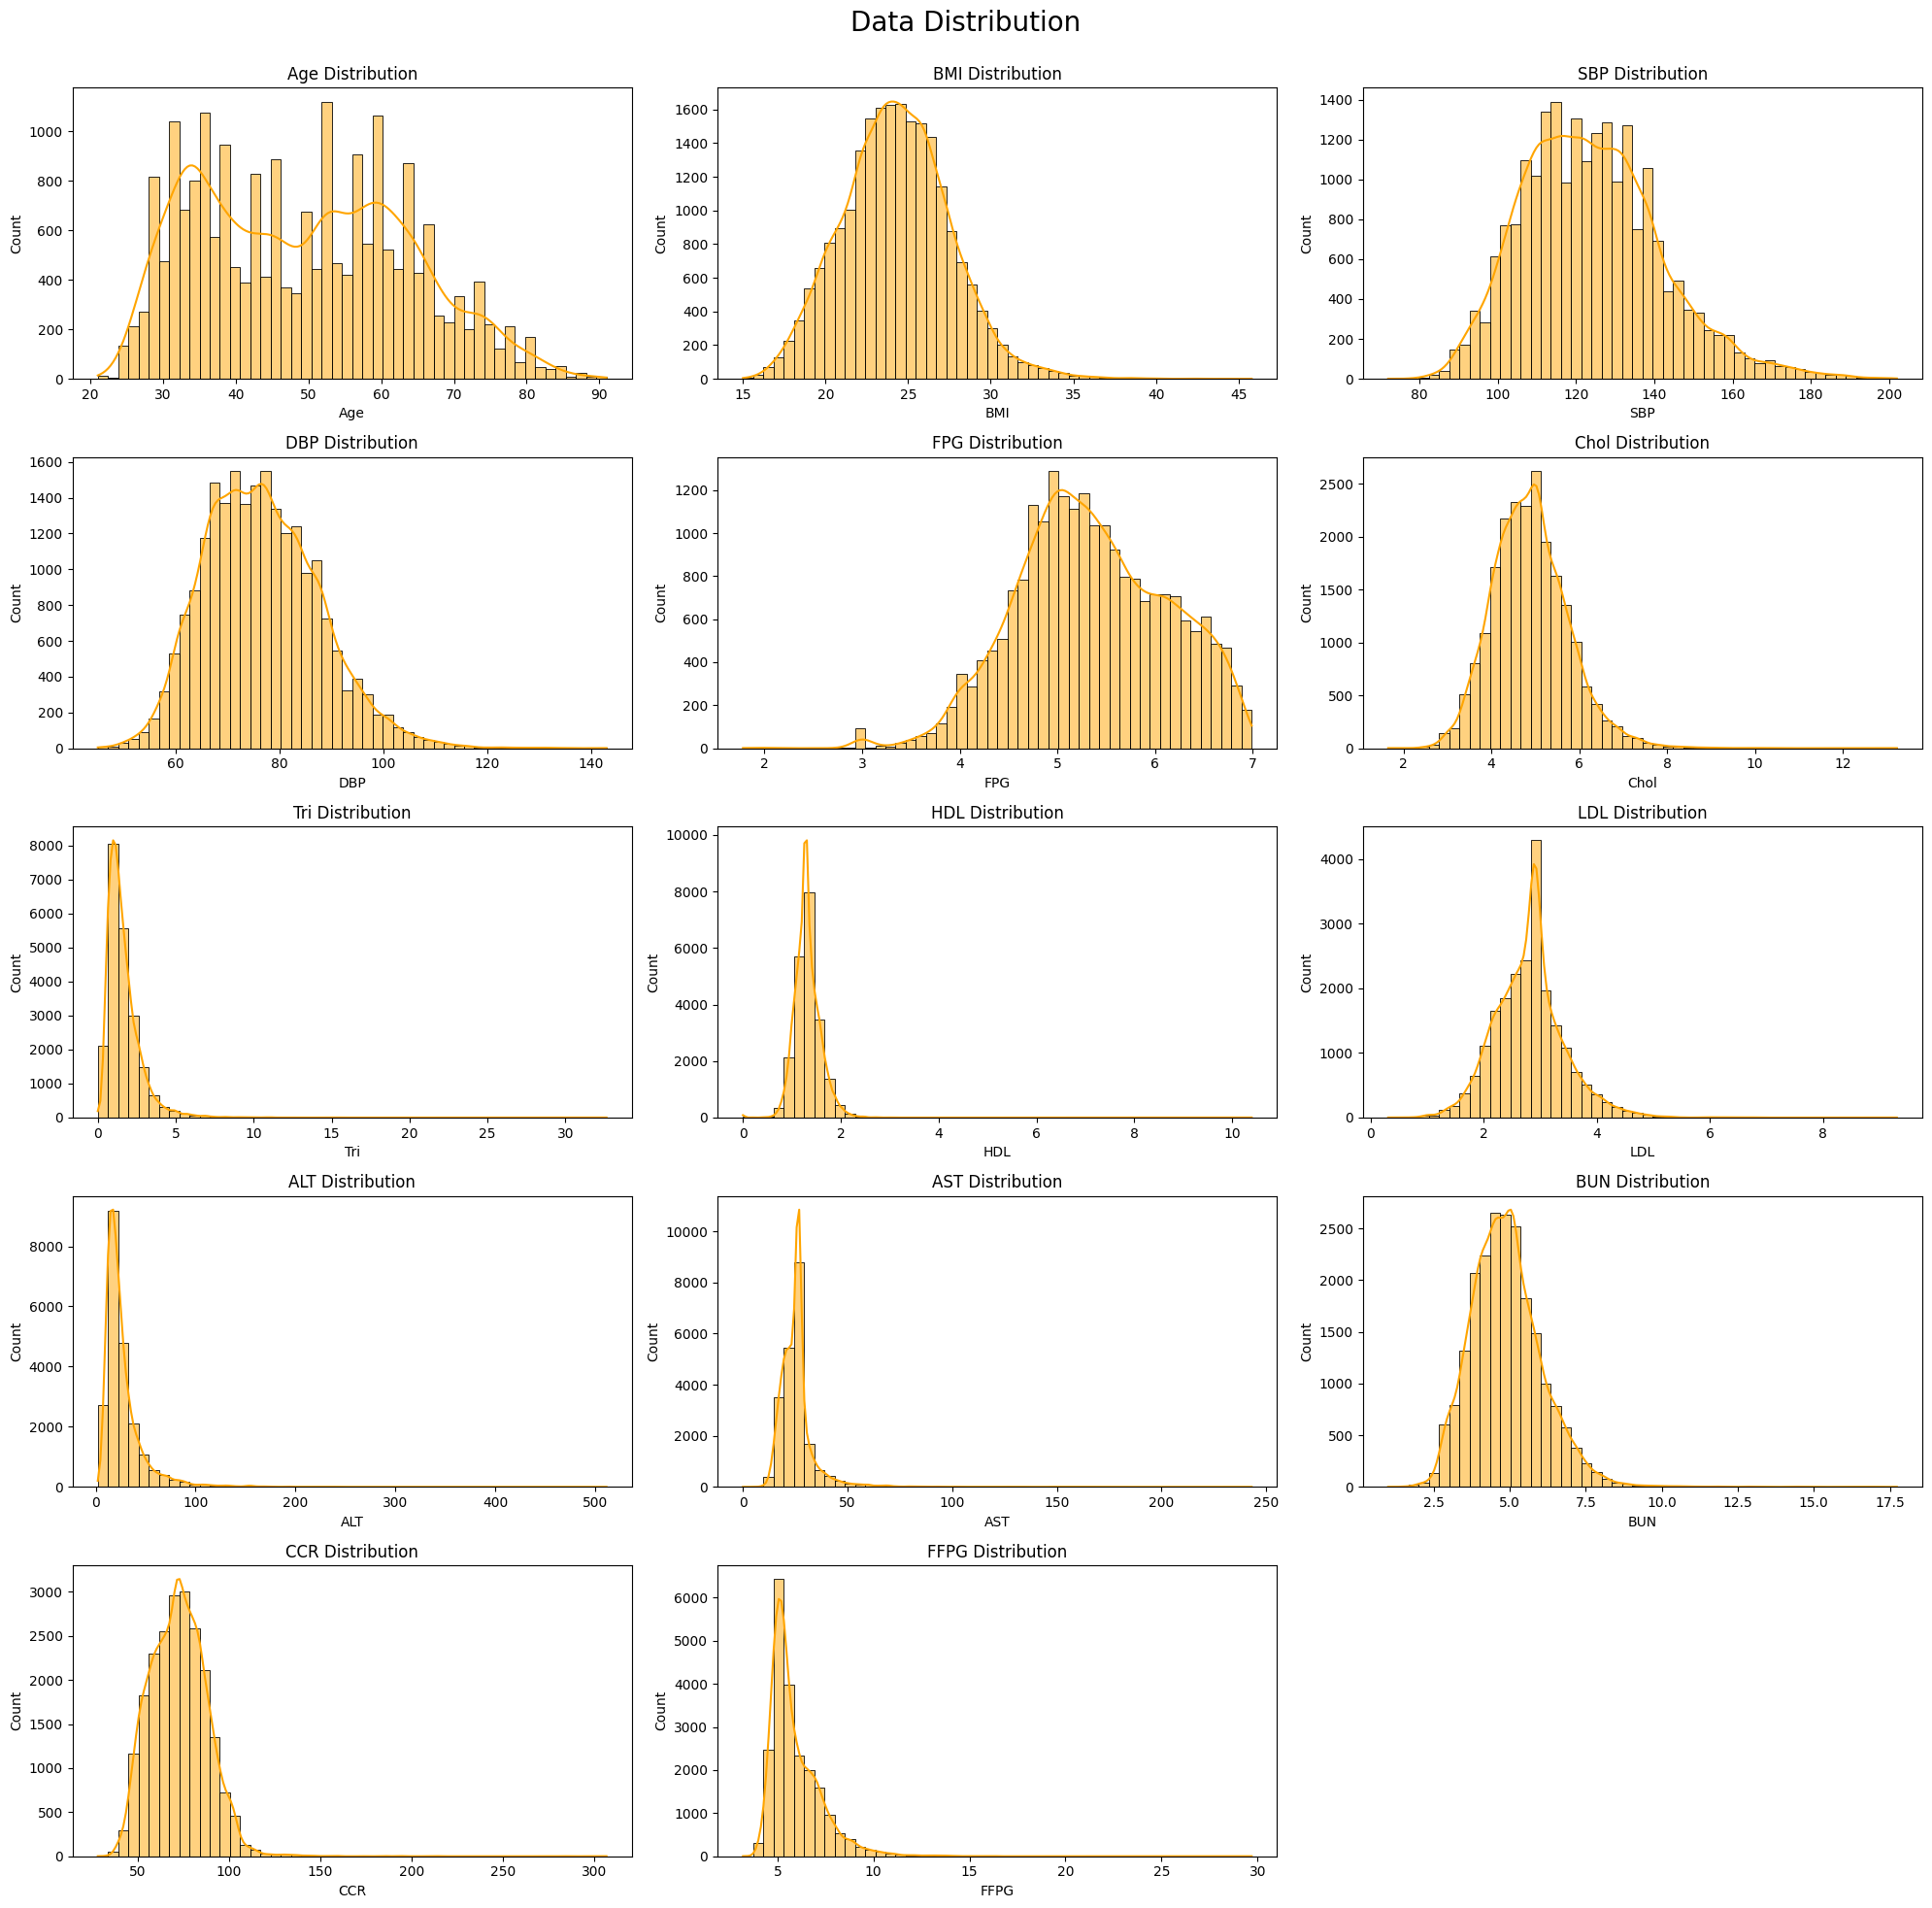

In [15]:
num_columns = df_num.columns
num_plots = len(num_columns)
cols = 3
rows = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = np.ravel(axes)

for i, col in enumerate(num_columns):
    sns.histplot(df_num[col], bins=50, kde=True, color="orange", ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Data Distribution", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Data Correlation

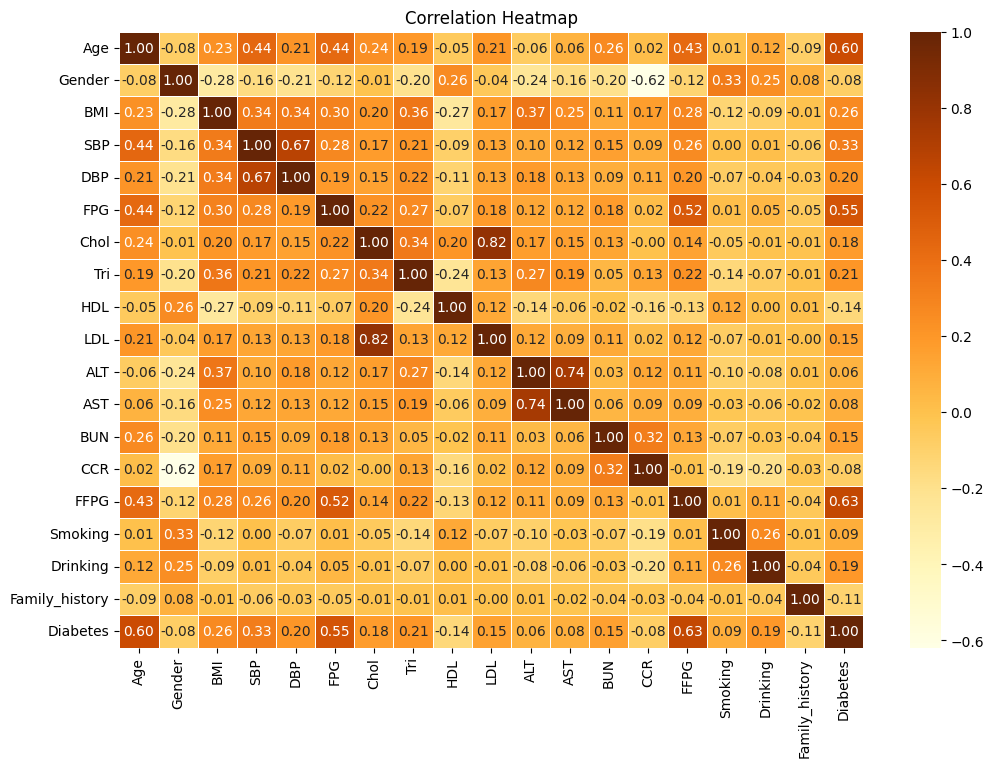

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Correlation Heatmap")
plt.show()

### Numerical Features vs Target

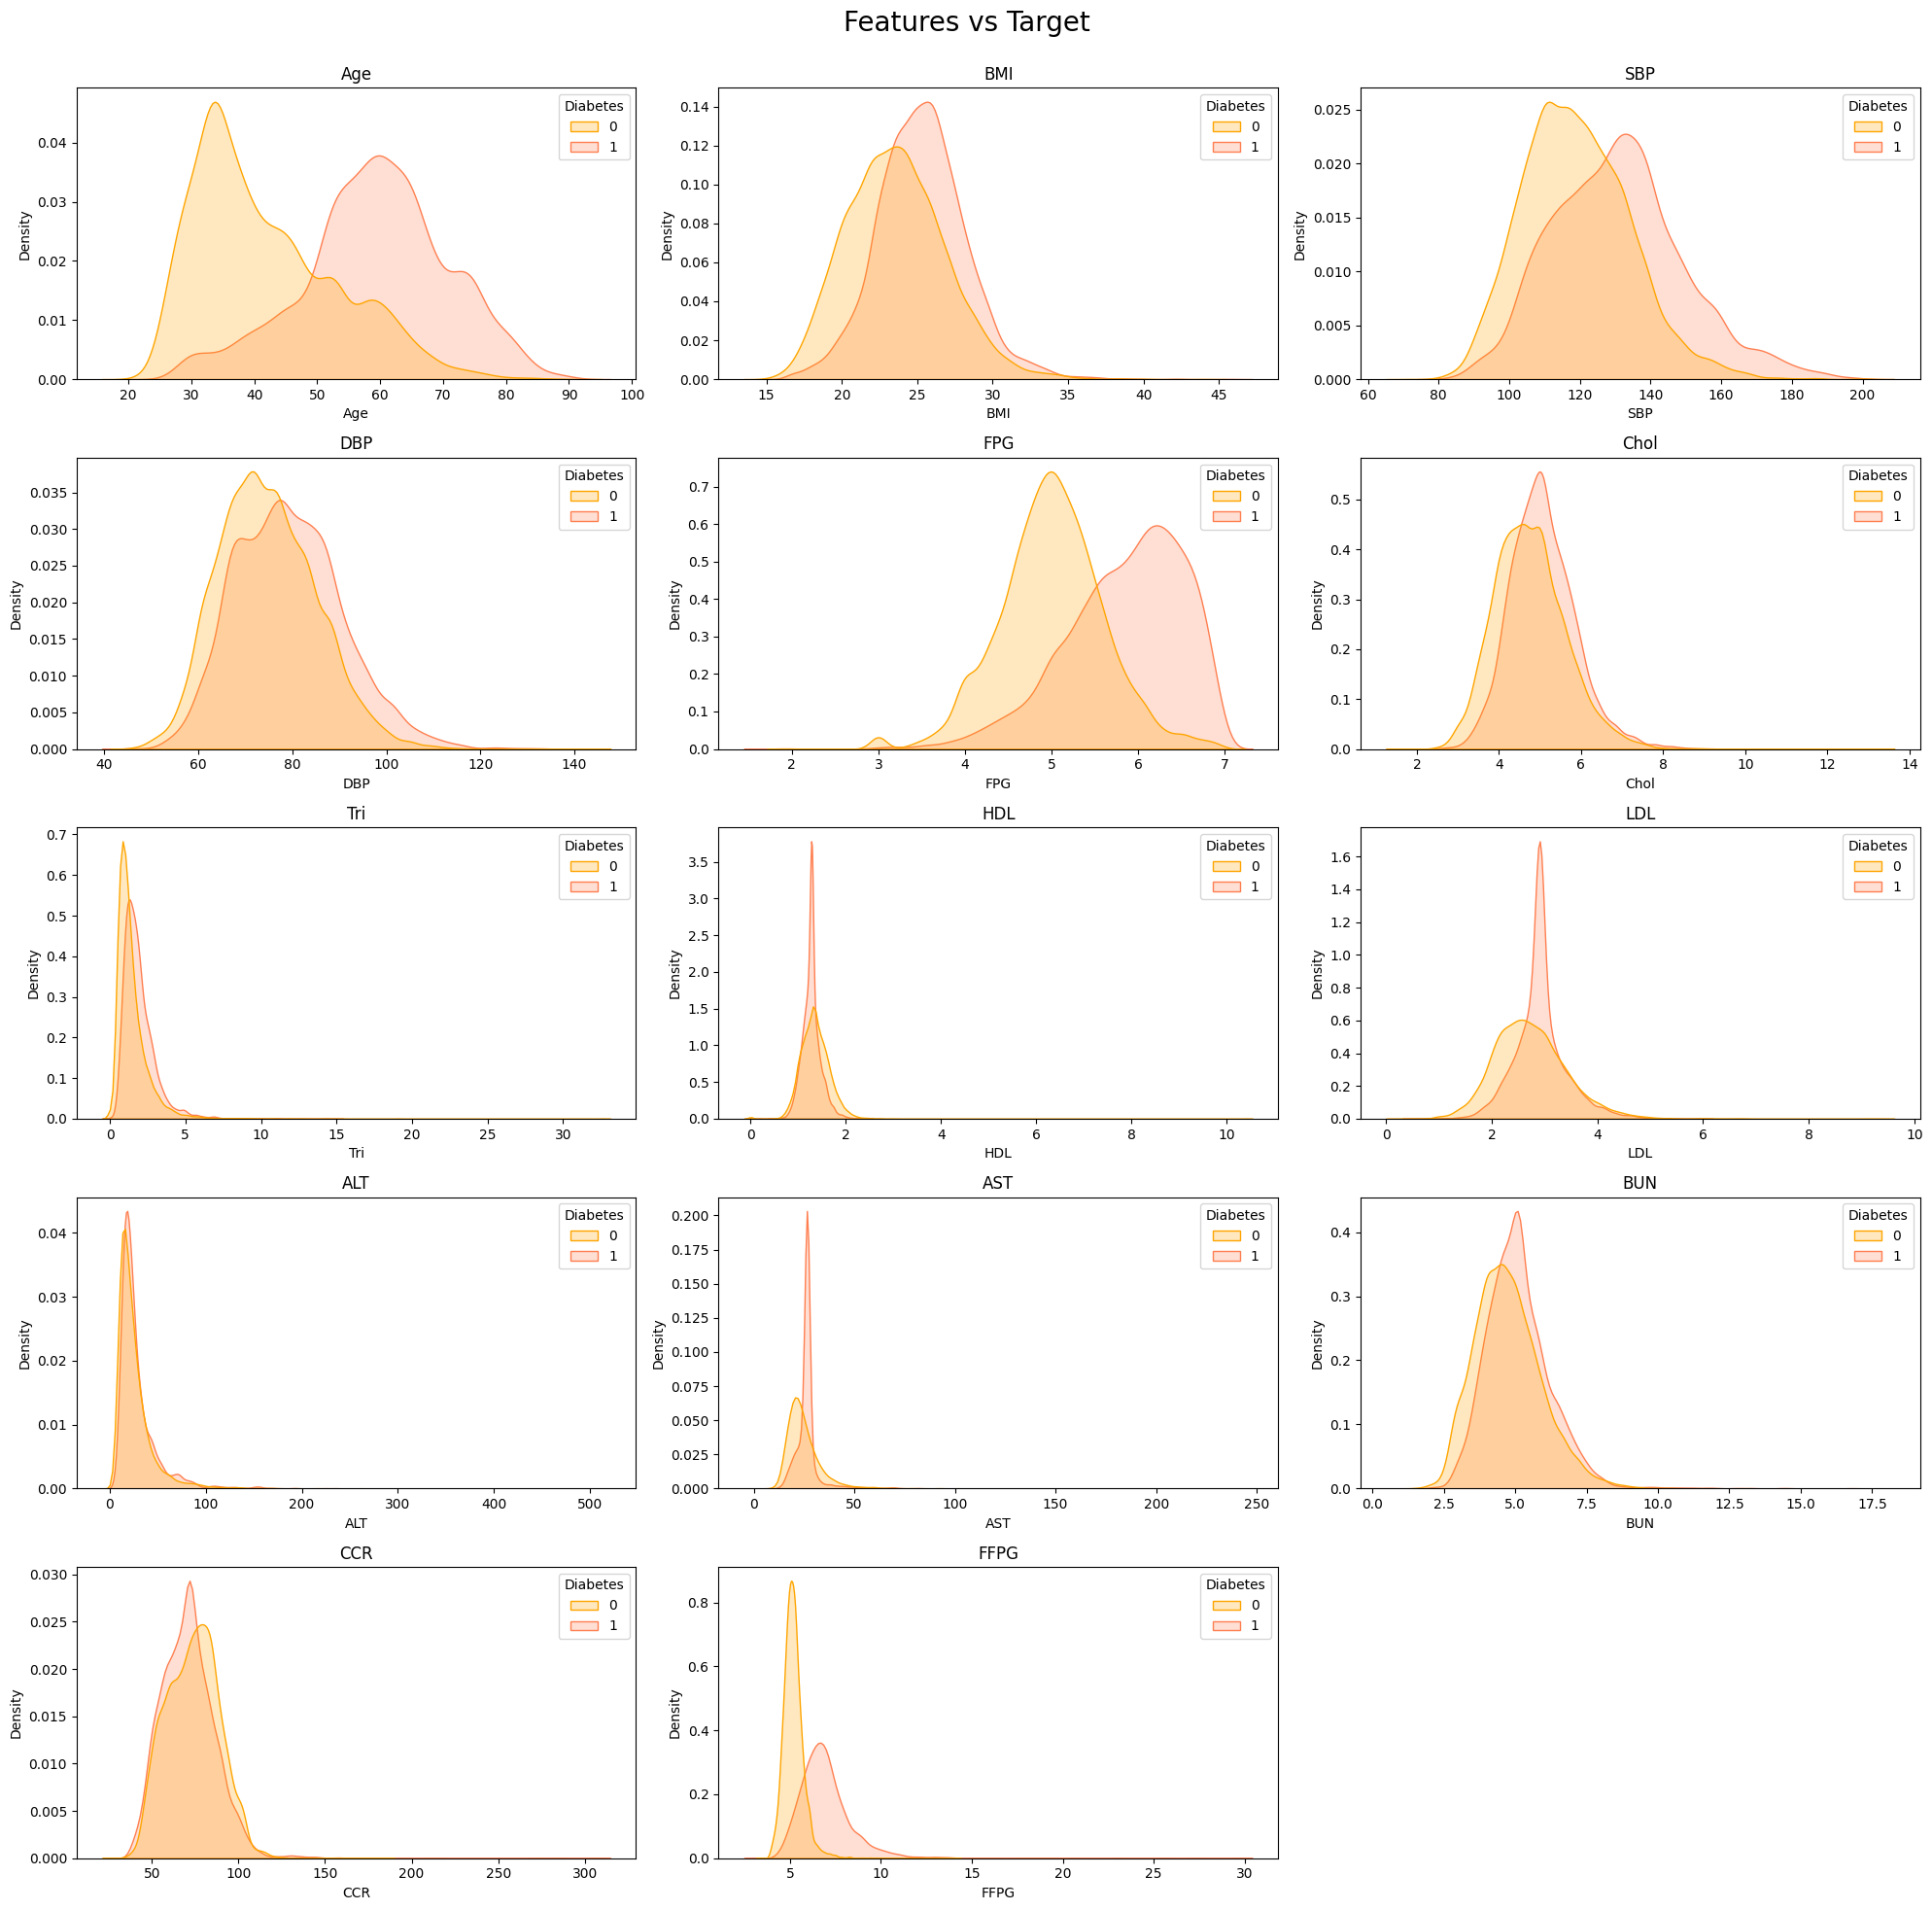

In [17]:
num_columns = df_num
target = "Diabetes"

cols = 3
rows = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False,
                palette=["orange", "coral"], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Features vs Target", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Outlier Detection

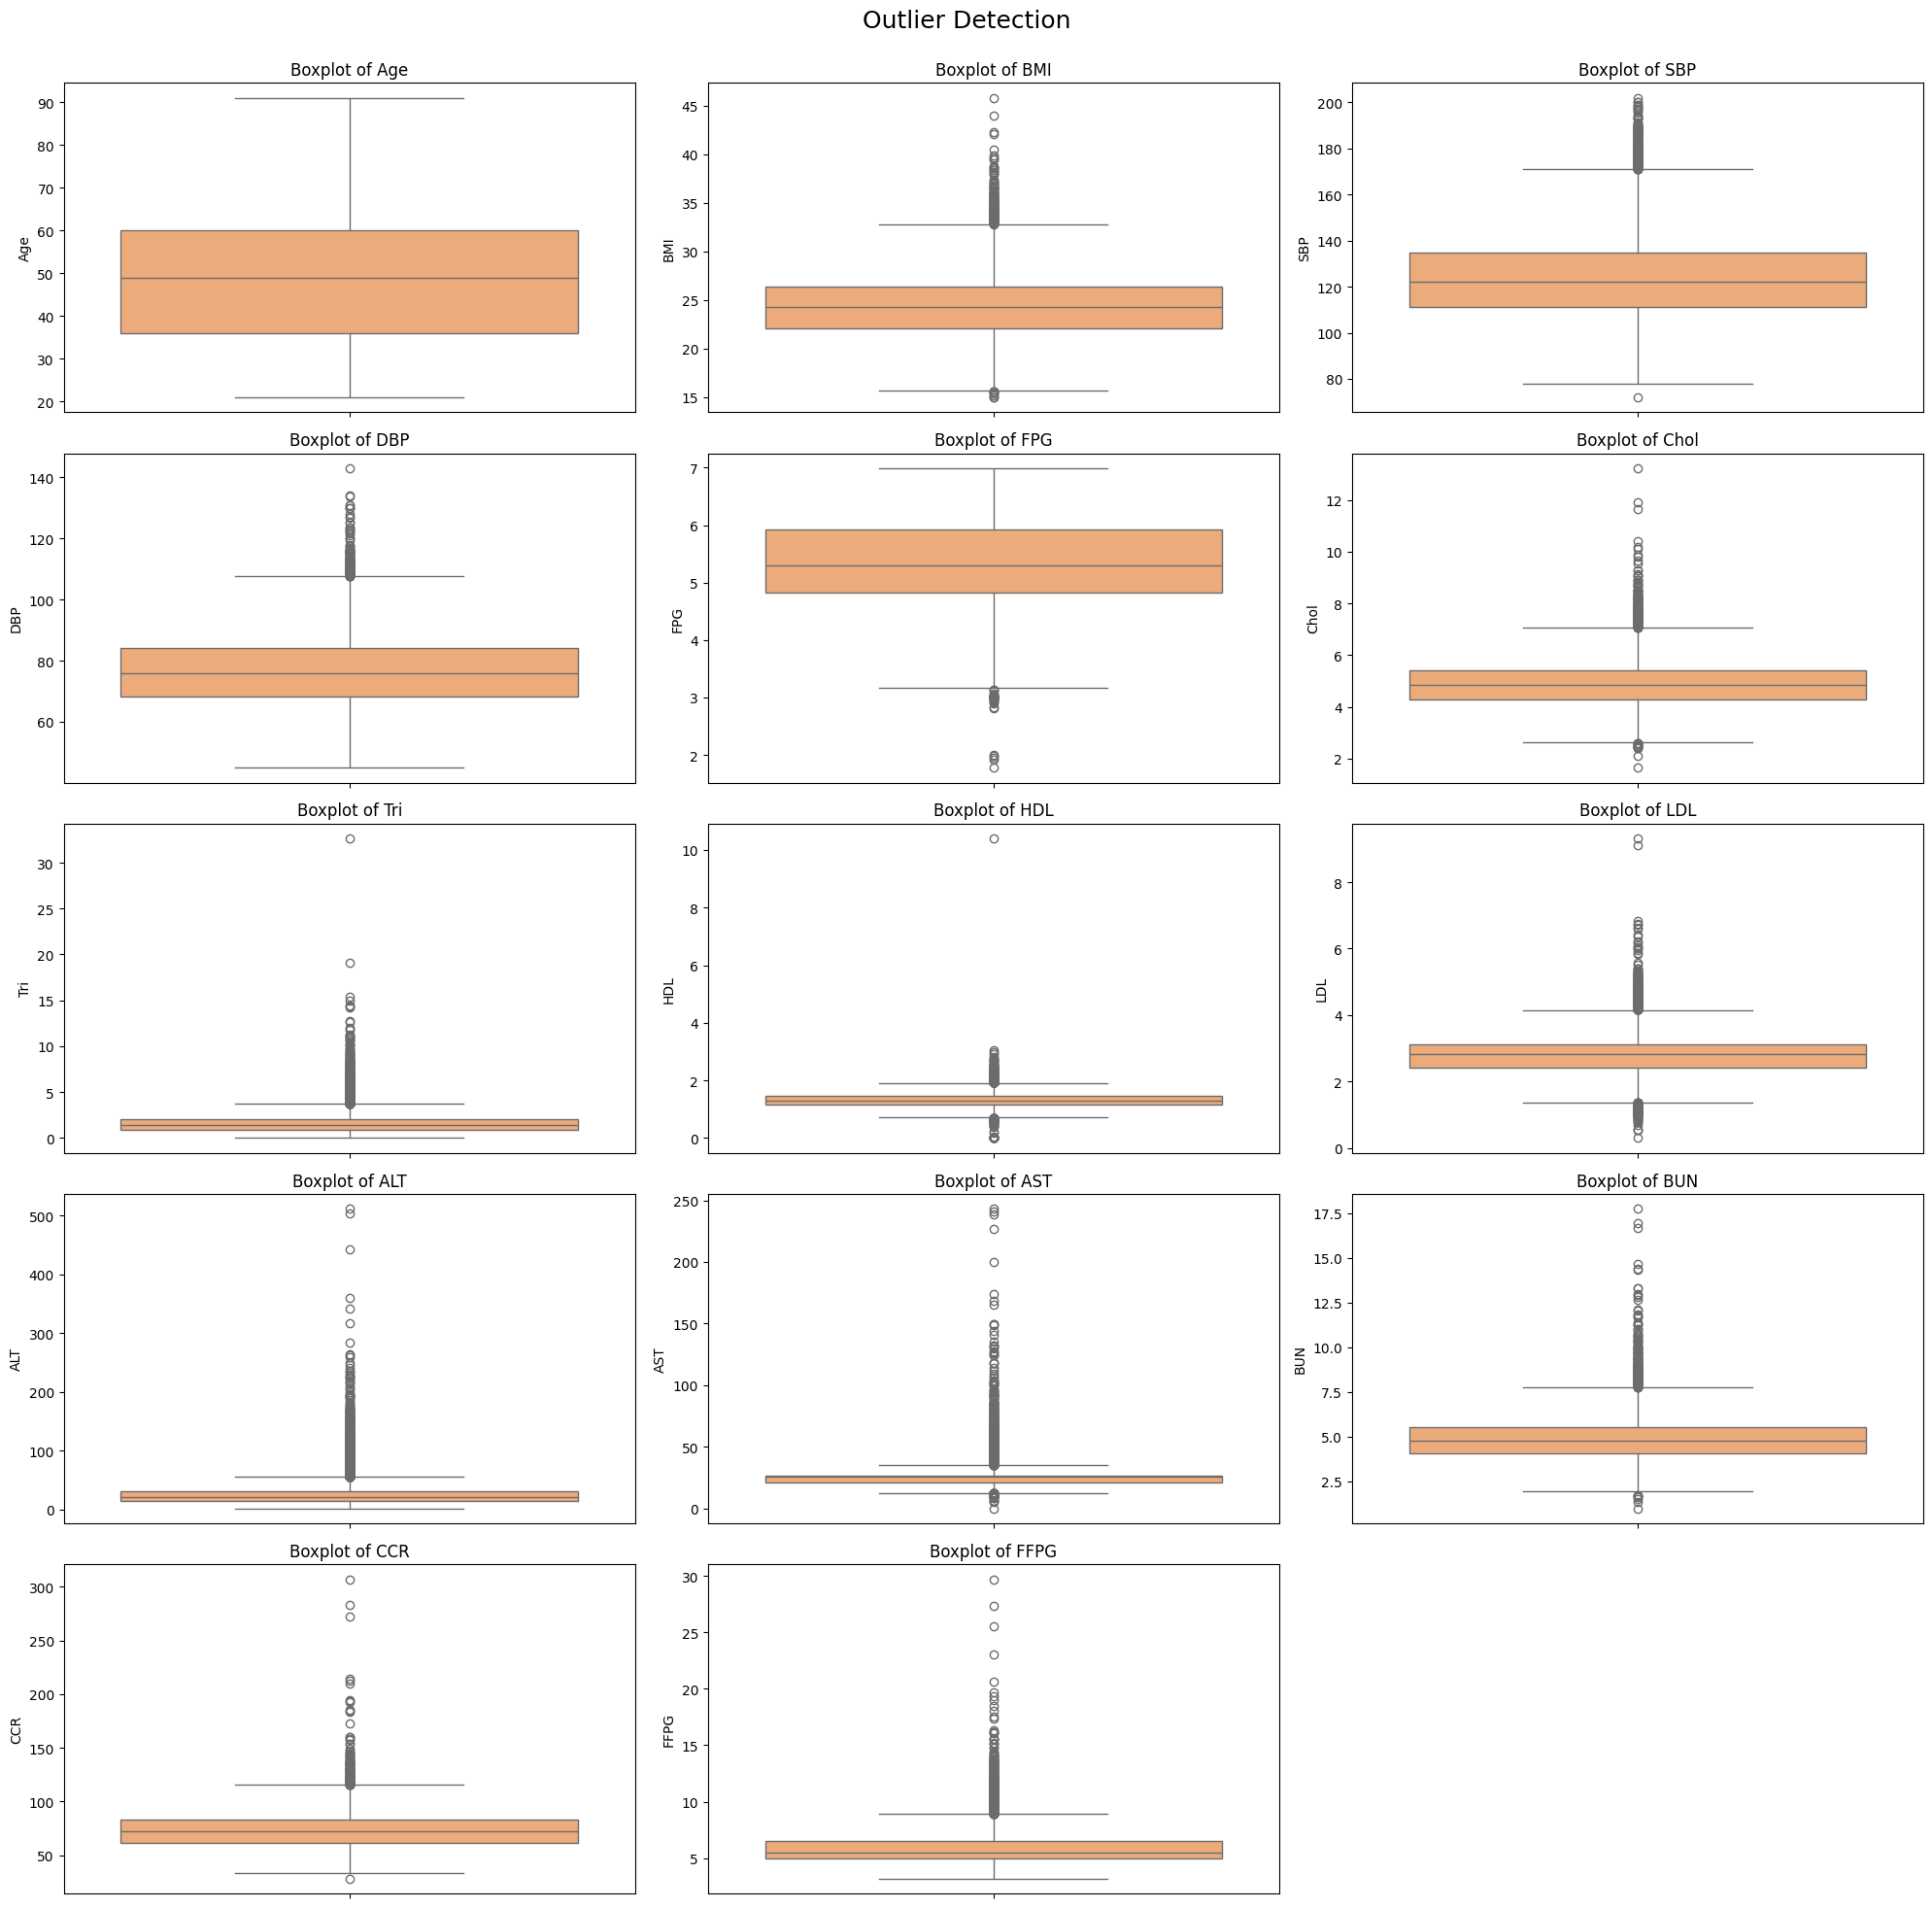

In [18]:
num_columns = df_num.columns
cols = 3
rows = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(data=df, y=col, palette=["#FFA868"], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Outlier Detection", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Categorical Feature Vs Target

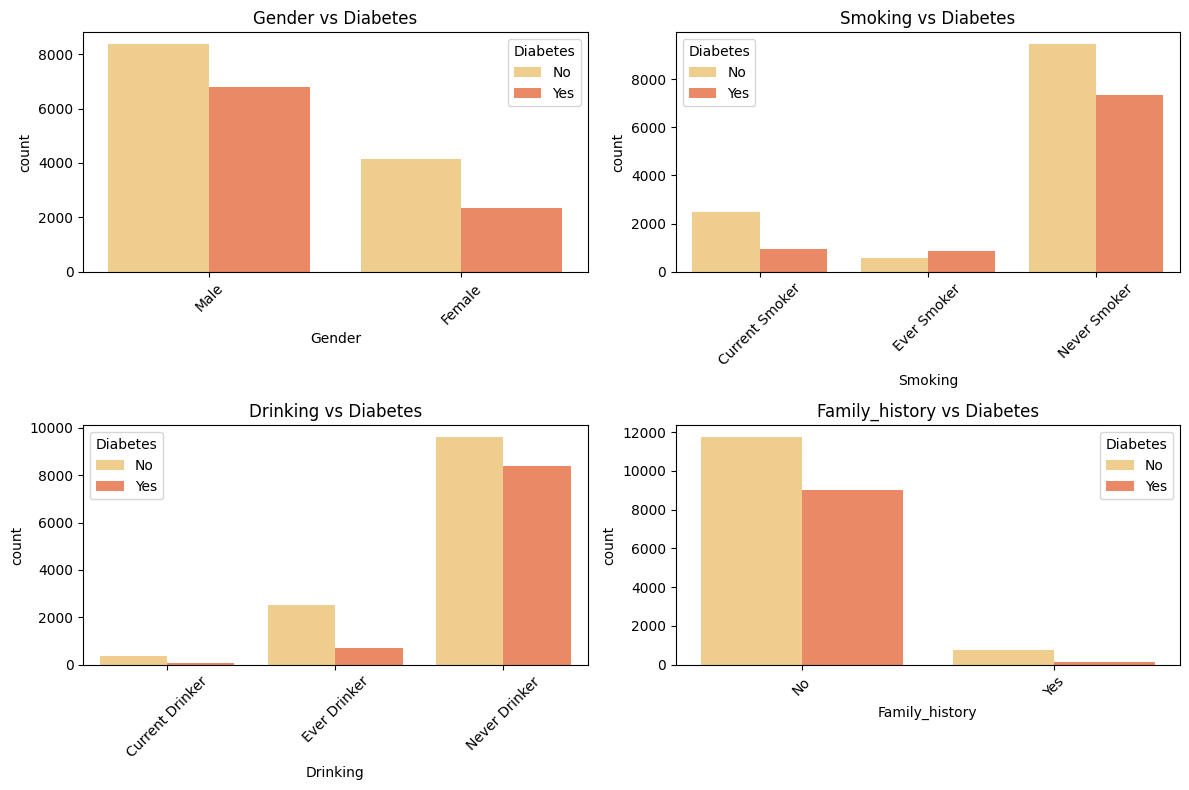

In [19]:
n_cols = 2
n_rows = (len(cat_columns[:-1]) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_columns[:-1]):
    sns.countplot(data=df_cat, x=col, hue="Diabetes", palette=["#ffd17f", "coral"], ax=axes[i])
    axes[i].set_title(f"{col} vs Diabetes")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Importance

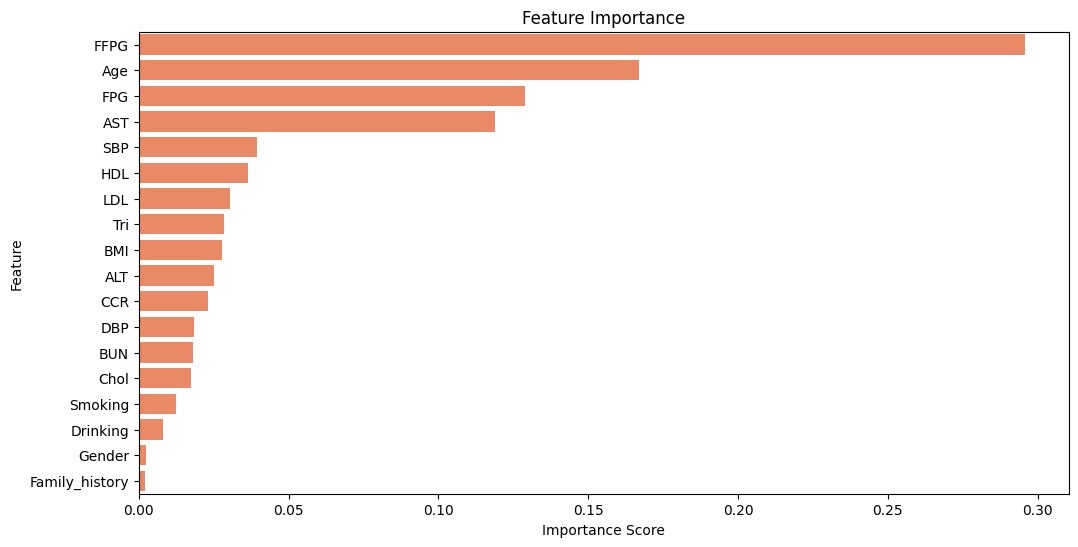

In [20]:
X_train = df.drop(columns=["Diabetes"])
y_train = df["Diabetes"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df,  palette=["coral"])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### Pair Plot

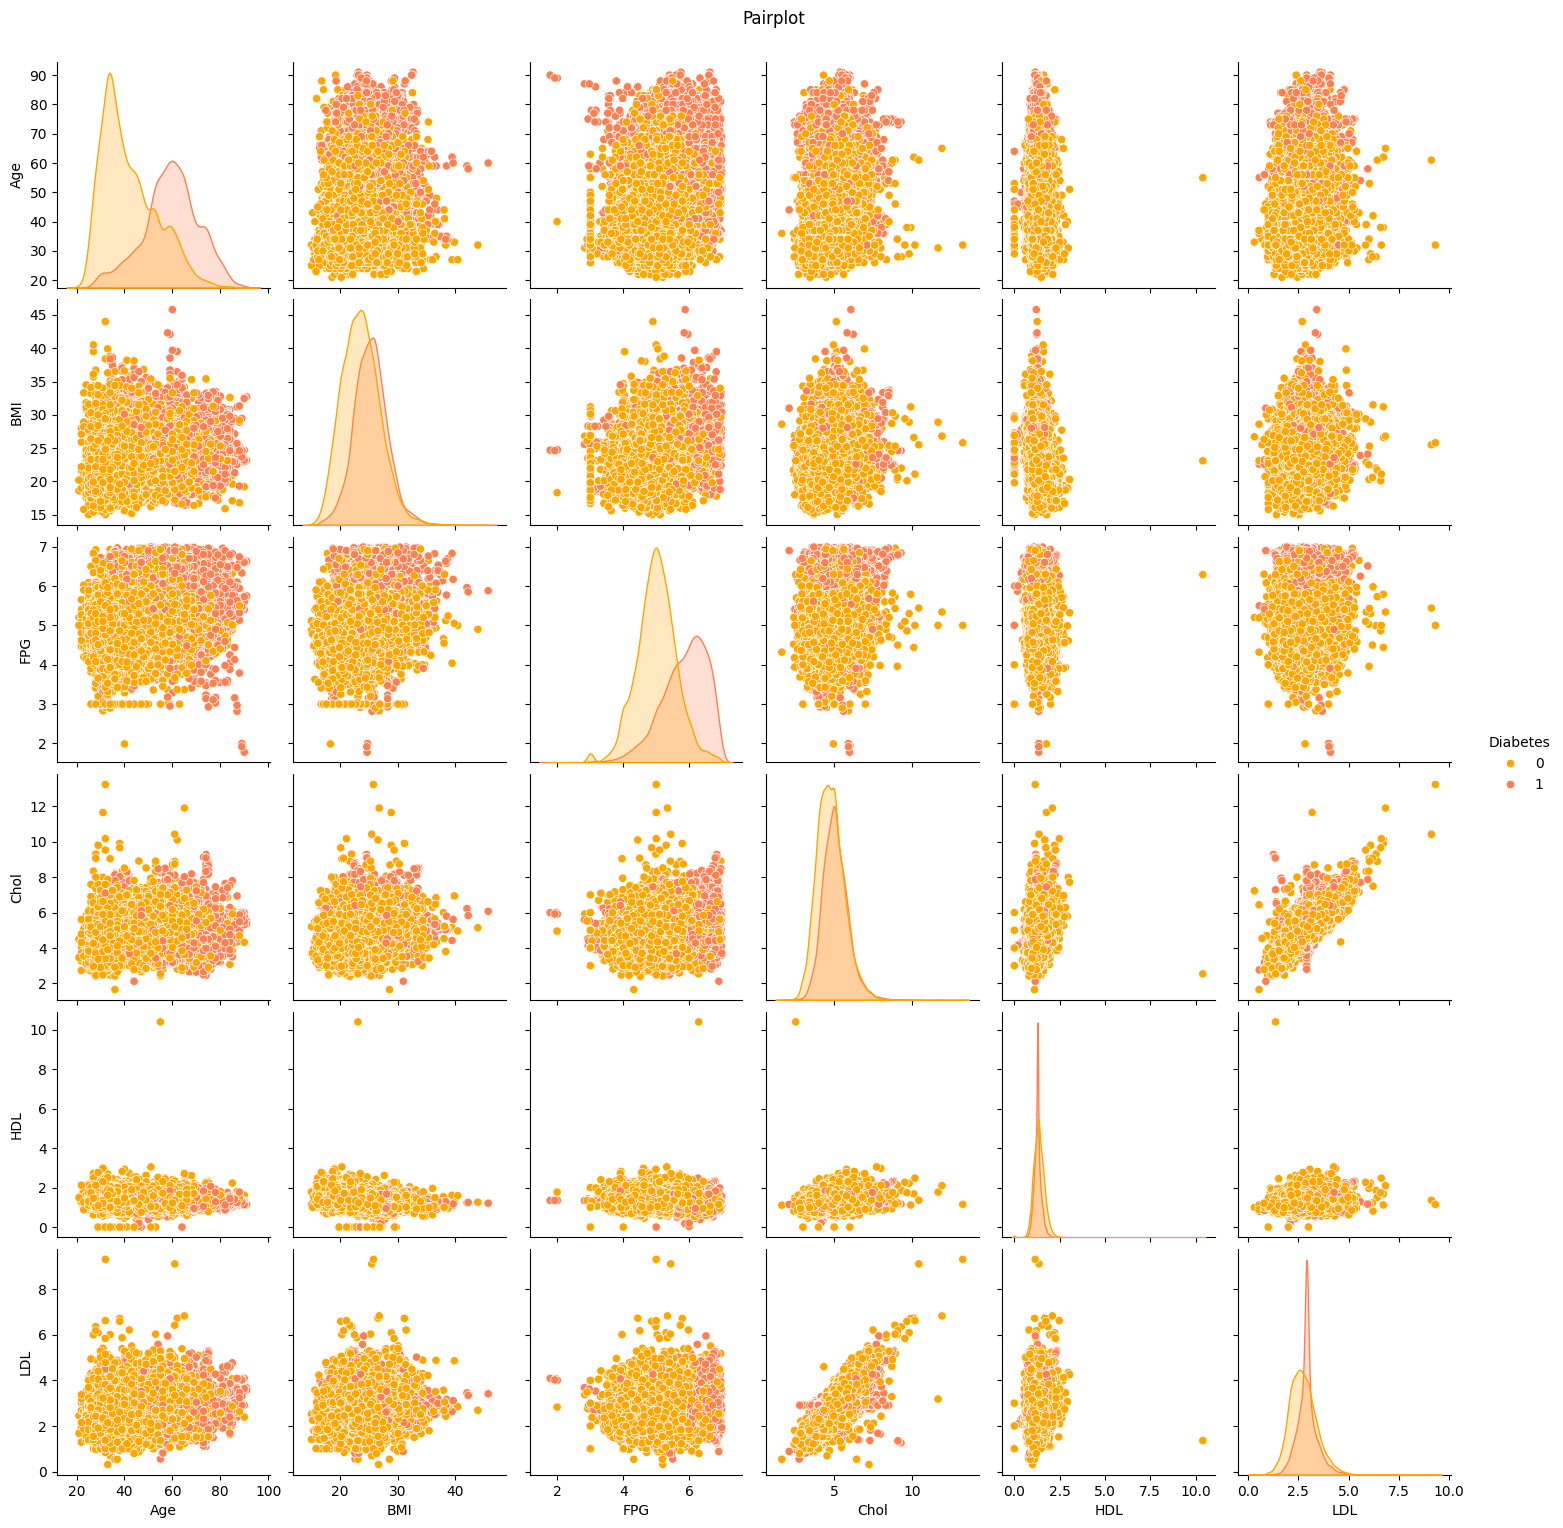

In [21]:
subset_cols = ['Age', 'BMI', 'FPG', 'Chol', 'HDL', 'LDL', 'Diabetes']
sns.pairplot(df[subset_cols], hue="Diabetes",
             palette=["orange", "coral"])
plt.suptitle("Pairplot", y=1.02)
plt.show()